In [2]:
%matplotlib inline

import os
from PIL import Image
from numpy import *
from pylab import *
fig = plt.figure(figsize=(10,10), dpi=288)

all_images = []
all_image_root = 'PH2Dataset/PH2 Dataset images'

#gather all images in all_image_root and store them in all_images
def gather_images():
    for dirpath, dirnames, filenames in os.walk(all_image_root):
        for filename in [f for f in filenames if ( f.endswith(".bmp") and "_" not in f  )]:
            all_images.append(os.path.join(dirpath, filename))

gather_images()

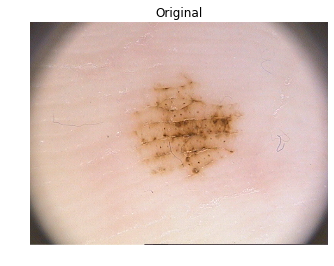

In [3]:
im = array(Image.open(all_images[4]))
plt.subplot(111)
title('Original')
axis('off')
imshow(im)
show()

# Testing with Blob Detection

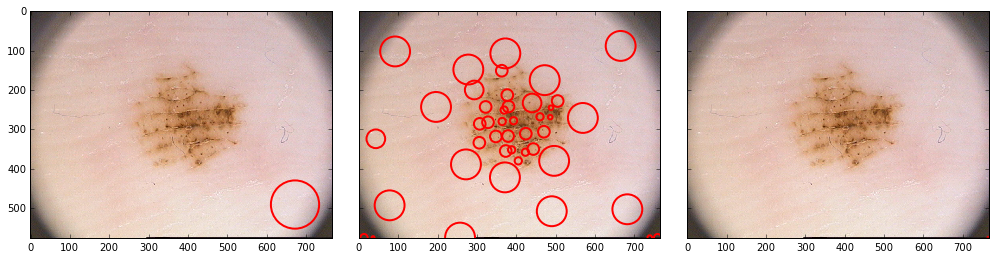

In [4]:
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

fig, axes = plt.subplots(1, 3, figsize=(14, 4), sharex=True, sharey=True,
                         subplot_kw={'adjustable': 'box-forced'})

plt.tight_layout()
axes = axes.ravel()


blobs_log = blob_log(rgb2gray(im), min_sigma=30, max_sigma=60, num_sigma=10, threshold=.1)
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(rgb2gray(im), max_sigma=30, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_doh = blob_doh(rgb2gray(im), max_sigma=30, threshold=.01)

blobs_list = [blobs_log, blobs_dog, blobs_doh]




for blobs in blobs_list:
    ax = axes[0]
    #ax.set_title('Original')
    axes = axes[1:]
    ax.imshow(im, interpolation='nearest')
    
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
        ax.add_patch(c)

plt.show()

# Testing with Thresholding

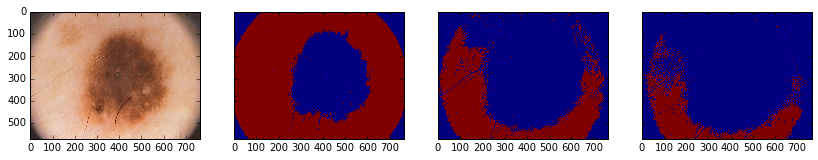

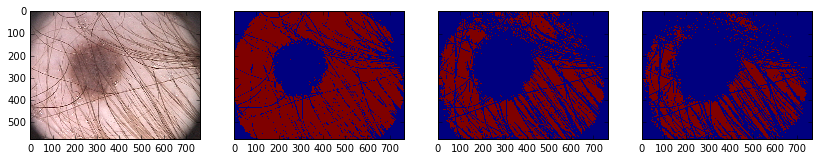

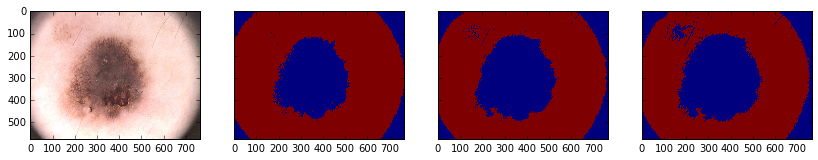

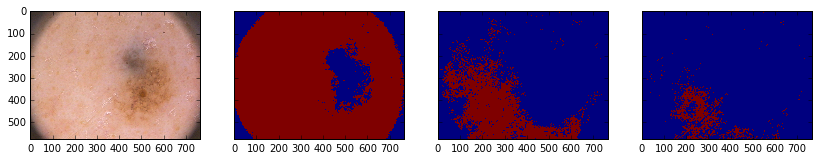

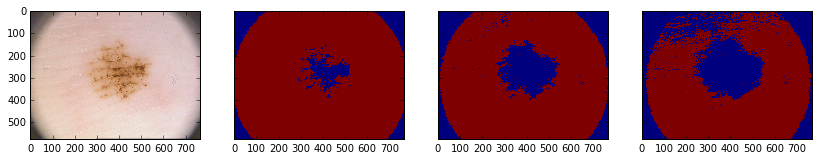

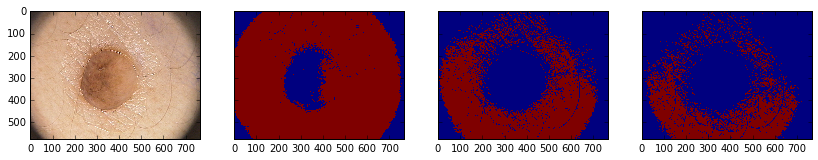

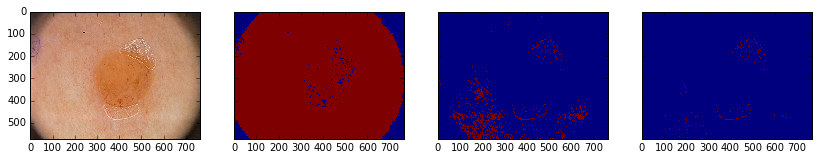

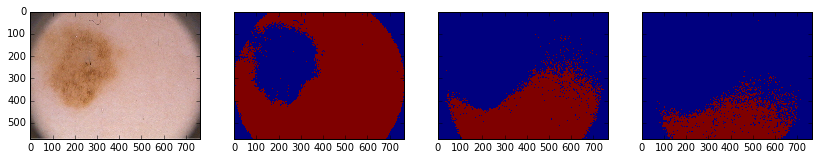

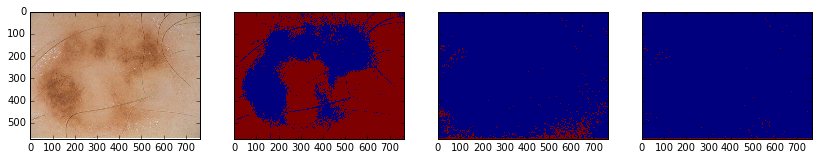

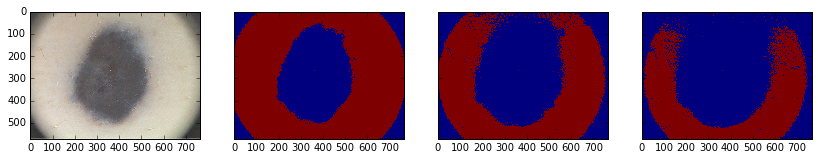

In [5]:
from skimage.filters import threshold_otsu

def thresh(im):

    fig, axes = plt.subplots(1, 4, figsize=(14, 4), sharex=True, sharey=True,
                             subplot_kw={'adjustable': 'box-forced'})

    ax = axes[0]
    axes = axes[1:]
    ax.imshow(im)
    
    
    otsu_1 = threshold_otsu(rgb2gray(im))

    ax = axes[0]
    axes = axes[1:]
    ax.imshow(rgb2gray(im) > otsu_1, interpolation='nearest')

    ax = axes[0]
    axes = axes[1:]
    ax.imshow(rgb2gray(im) > 0.7, interpolation='nearest')

    ax = axes[0]
    axes = axes[1:]
    ax.imshow(rgb2gray(im) > 0.74, interpolation='nearest')
    
    show()
    
for i in range(10):
    im = array(Image.open(all_images[i]))
    thresh(im)

# Blur then Threshold


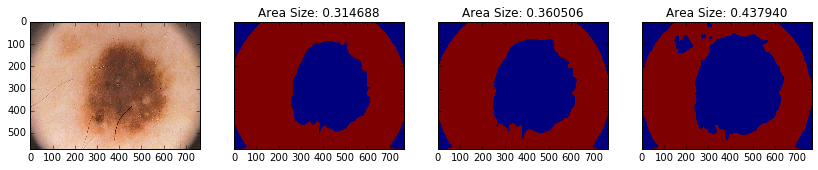

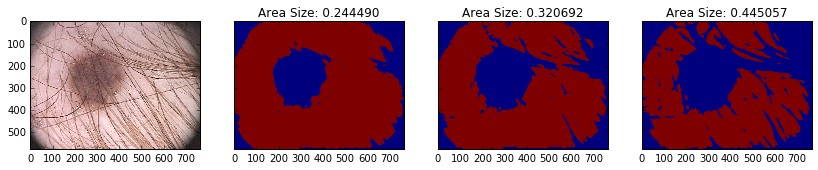

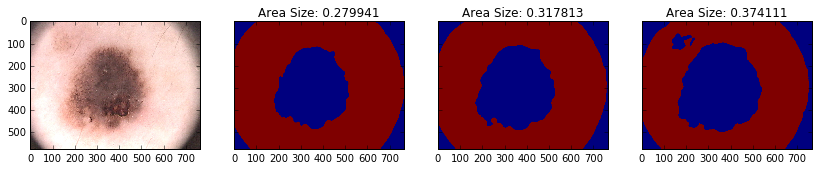

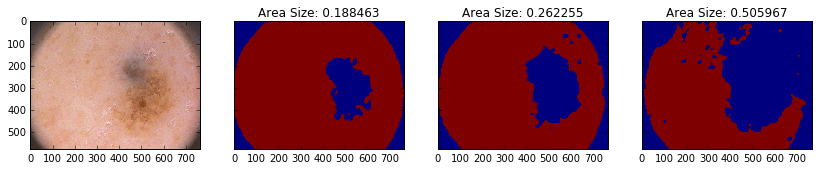

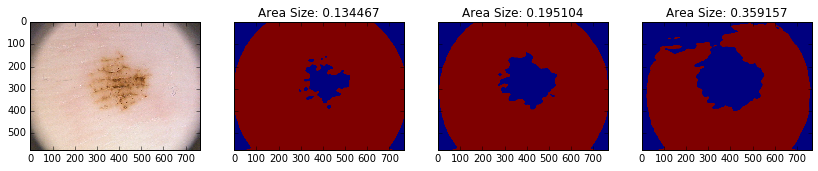

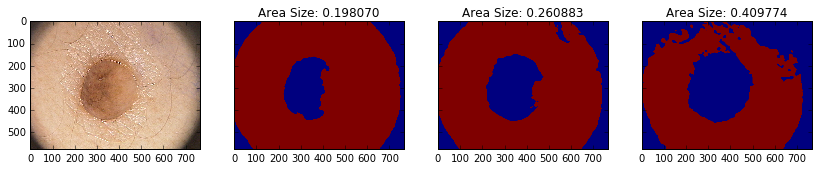

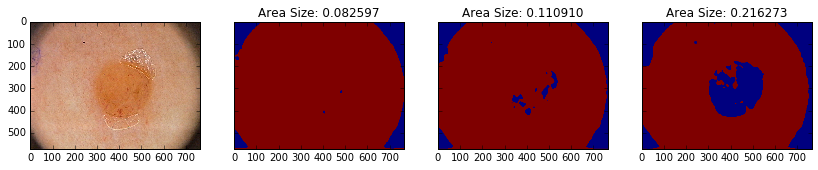

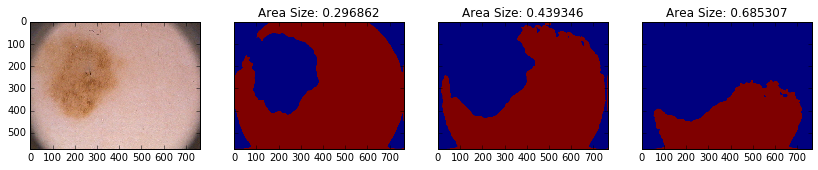

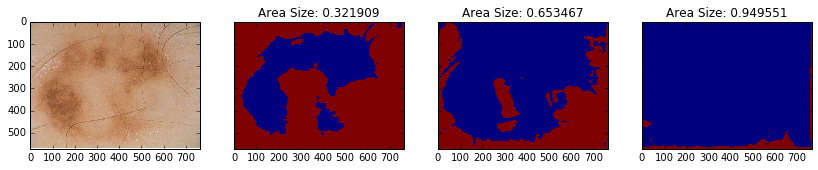

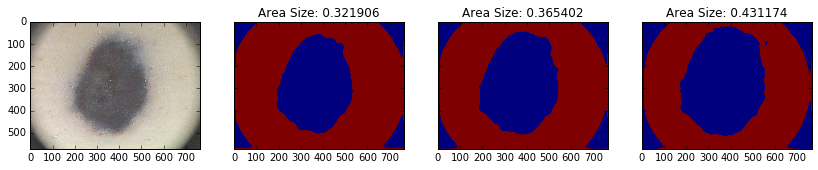

In [6]:
from skimage.filters import threshold_otsu
from skimage.filters import gaussian

def blur_thresh(im):
    
        
    num_data, dim, channels = im.shape
    num_of_pixels = num_data*dim

    fig, axes = plt.subplots(1, 4, figsize=(14, 4), sharex=True, sharey=True,
                             subplot_kw={'adjustable': 'box-forced'})


    ax = axes[0]
    axes = axes[1:]
    ax.imshow(im, interpolation='nearest')

    grey_img = rgb2gray(im)
    grey_img = gaussian(grey_img, 5)

    otsu = threshold_otsu(grey_img)

    mask = grey_img > otsu
    ax = axes[0]
    axes = axes[1:]
    ax.set_title('Area Size: %f' % (1 - mask.sum() / num_of_pixels))
    ax.imshow(mask)
    
    mask = grey_img > (otsu * 1.1)
    ax = axes[0]
    axes = axes[1:]
    ax.set_title('Area Size: %f' % (1 - mask.sum() / num_of_pixels))
    ax.imshow(mask)
    
    mask = grey_img > (otsu * 1.2)
    ax = axes[0]
    axes = axes[1:]
    ax.set_title('Area Size: %f' % (1 - mask.sum() / num_of_pixels))
    ax.imshow(mask)
    
    show()
    


for i in range(10):
    im = array(Image.open(all_images[i]))
    blur_thresh(im)

Area Size is the total number of positiv mask values ( Blur Area ) divided by the total number of pixels. This index might be used in combination with other properties to test if the image has enough discernable information for further analysis.

# Median Then Blur Then Threshold:



/Users/alexandergustafson/anaconda/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


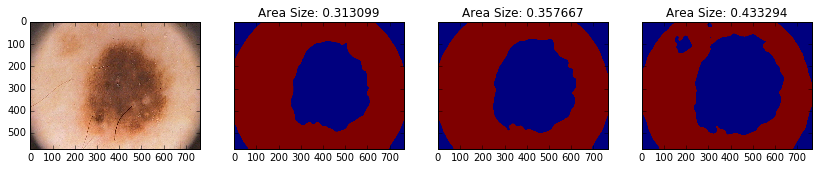

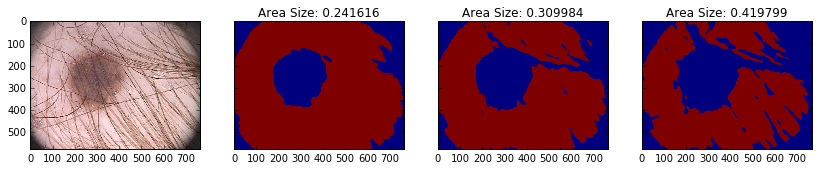

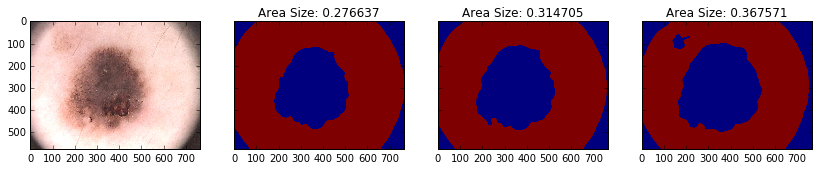

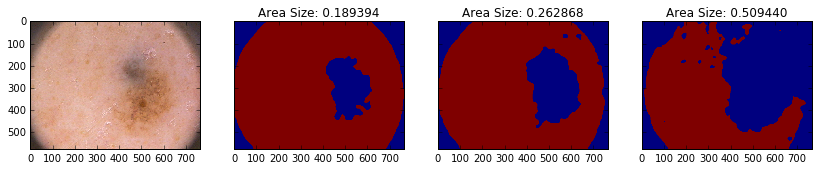

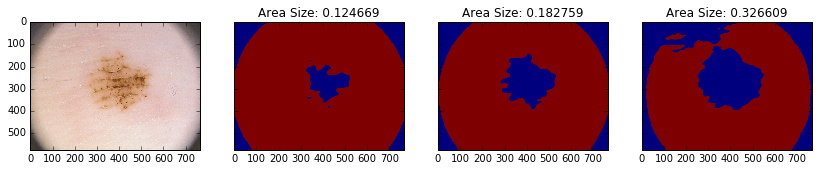

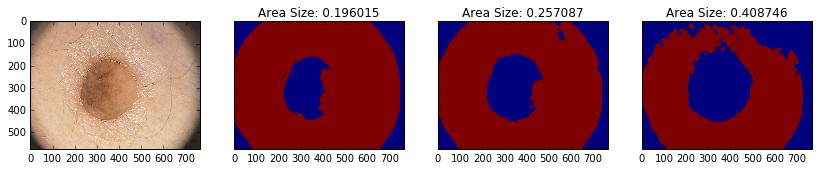

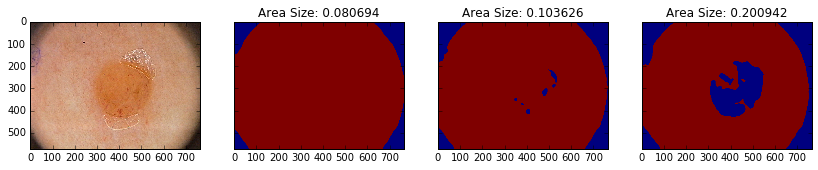

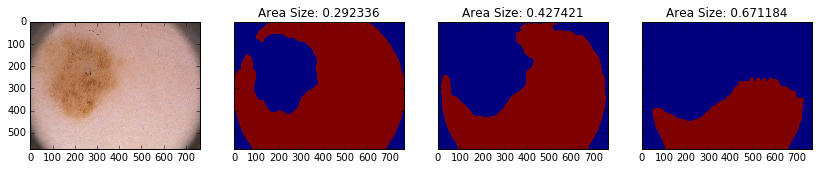

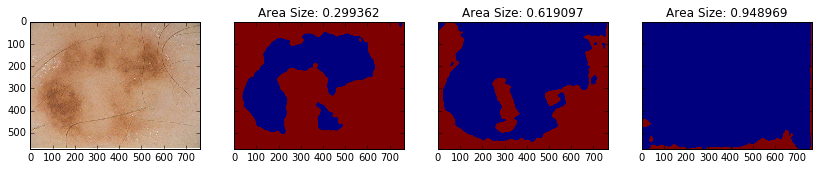

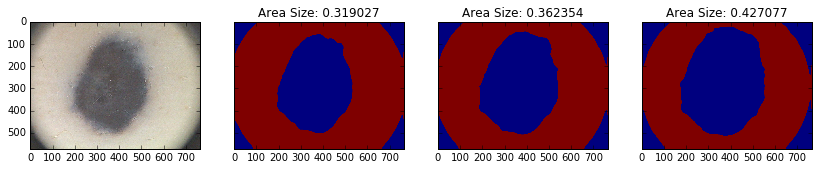

In [7]:
from skimage.filters import threshold_otsu
from skimage.morphology import disk
from skimage.filters import median
from skimage.filters import gaussian


def blur_thresh(im):
    
    num_data, dim, channels = im.shape
    num_of_pixels = num_data*dim

    fig, axes = plt.subplots(1, 4, figsize=(14, 4), sharex=True, sharey=True,
                             subplot_kw={'adjustable': 'box-forced'})


    ax = axes[0]
    axes = axes[1:]
    ax.imshow(im, interpolation='nearest')

    grey_img = rgb2gray(im)
    grey_img = median(grey_img, disk(8))
    grey_img = gaussian(grey_img, 5)

    otsu = threshold_otsu(grey_img)
    mask1 = grey_img > otsu

    ax = axes[0]
    axes = axes[1:]
    ax.set_title('Area Size: %f' % (1 - mask1.sum() / num_of_pixels))
    ax.imshow(mask1)
    
    mask2 = grey_img > (otsu * 1.1)
    ax = axes[0]
    axes = axes[1:]
    ax.set_title('Area Size: %f' % (1 - mask2.sum() / num_of_pixels))
    ax.imshow(mask2)

    mask3 = grey_img > (otsu * 1.2)
    ax = axes[0]
    axes = axes[1:]
    ax.set_title('Area Size: %f' % (1 - mask3.sum() / num_of_pixels))
    ax.imshow(mask3)

    show()
    
    return mask1, mask2, mask3
    

for i in range(10):
    im = array(Image.open(all_images[i]))
    blur_thresh(im)

Area Size is the total number of positiv mask values ( Blur Area ) divided by the total number of pixels. This index might be used in combination with other properties to test if the image has enough discernable information for further analysis.

# Segmentaion with Watershed

/Users/alexandergustafson/anaconda/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


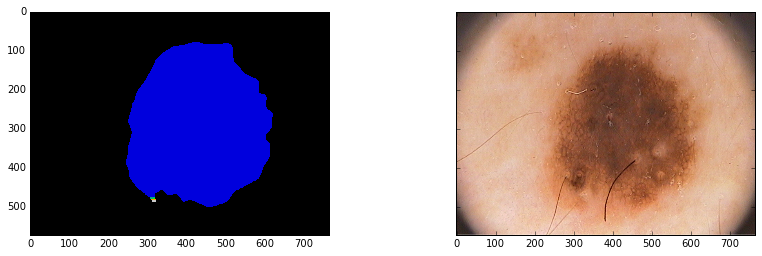

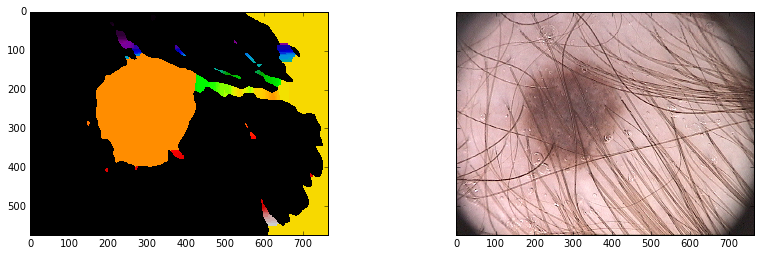

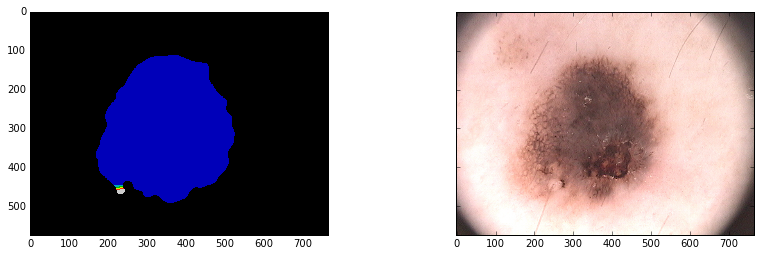

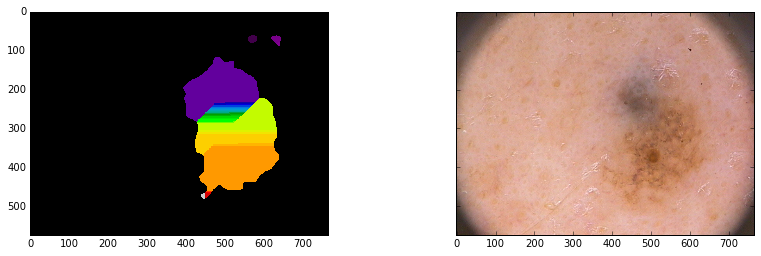

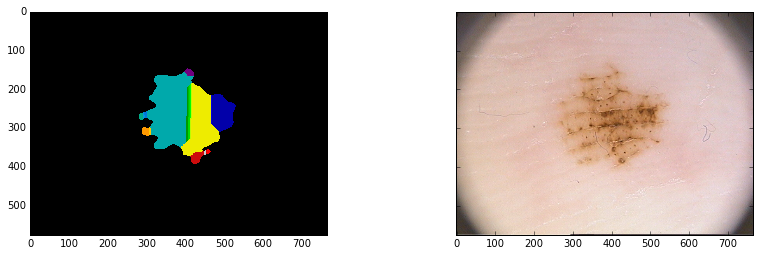

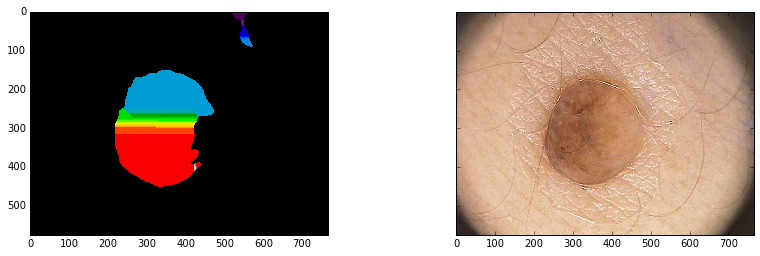

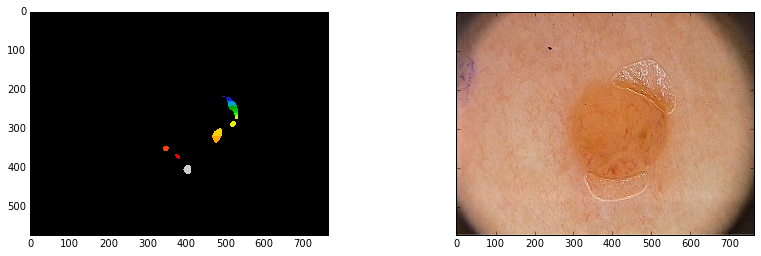

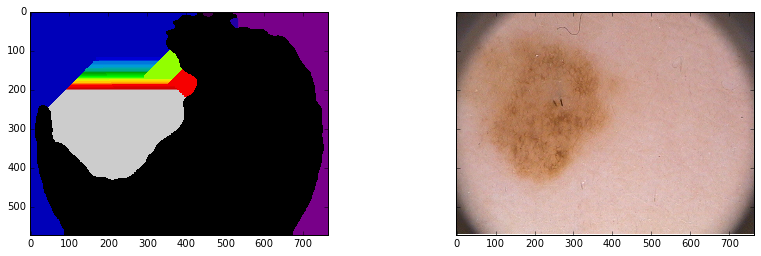

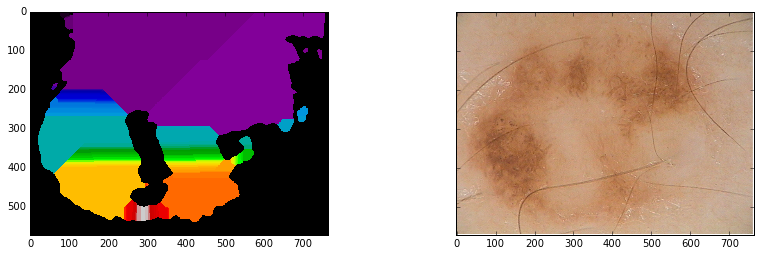

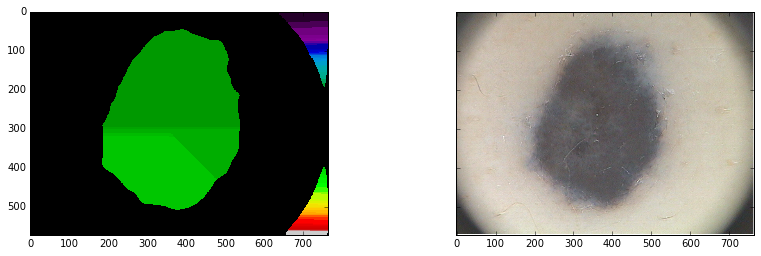

In [8]:
from scipy import ndimage as ndi
from skimage.morphology import watershed
from skimage.feature import peak_local_max

def create_mask(image):

    grey_img = rgb2gray(image)
    grey_img = median(grey_img, disk(8))
    grey_img = gaussian(grey_img, 5)

    otsu = threshold_otsu(grey_img)
    mask = grey_img > (otsu * 1.1)
    
    return mask

def segment_w(image):
    #create Mask
    mask = create_mask(image)
    mask = invert(mask)
    
    distance = ndi.distance_transform_edt(mask)
    local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)), labels=mask)
    
    markers = ndi.label(local_maxi)[0]
    labels = watershed(-distance, markers, mask=mask)

    
    fig, axes = plt.subplots(1, 2, figsize=(14, 4), sharex=True, sharey=True,
                             subplot_kw={'adjustable': 'box-forced'})

    ax = axes[0]
    axes = axes[1:]
    ax.imshow(labels, cmap=plt.cm.spectral, interpolation='nearest')
              
    ax = axes[0]
    axes = axes[1:]
    ax.imshow(image)
    show()
    
for i in range(10):
    im = array(Image.open(all_images[i]))
    segment_w(im)

### Summary : 

Watershed is not usefull in the context. Watershed produces too many labeled areas. The algorithm treats the mask as an elevation map which it "fills with water". This can "detect" distinct separate areas even though they might share boarders. 

nice explanation here : http://de.mathworks.com/company/newsletters/articles/the-watershed-transform-strategies-for-image-segmentation.html

I thought this might be able to separate a ROI from the circular boarder of the image. Produces too many labeled regions though. Maybe try with other threshold parameters.

# Segmentaion : Mask then Label, Remove Small Objects, Select Largest


/Users/alexandergustafson/anaconda/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


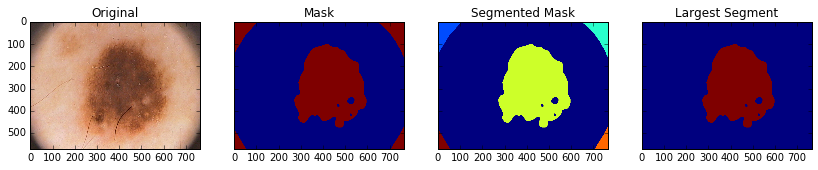

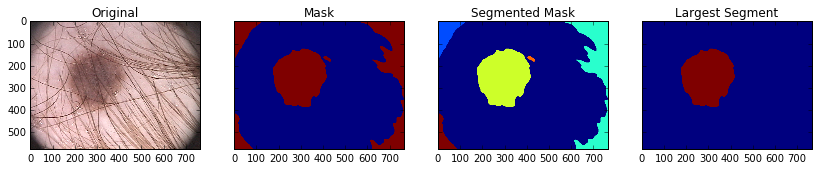

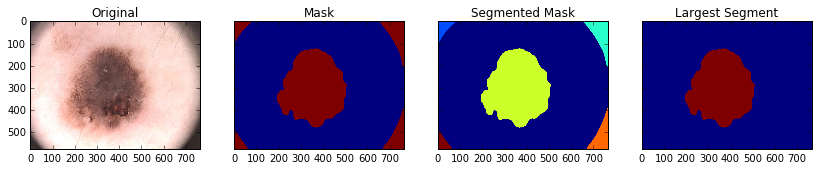

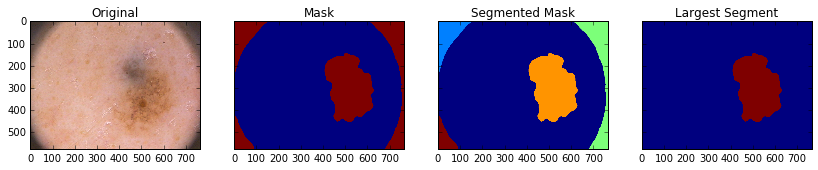

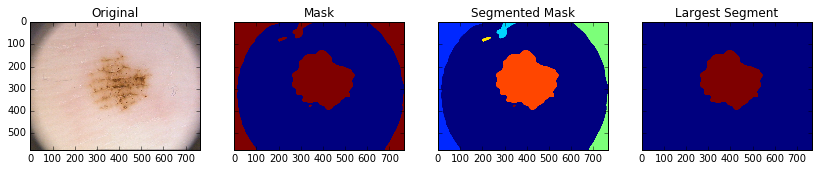

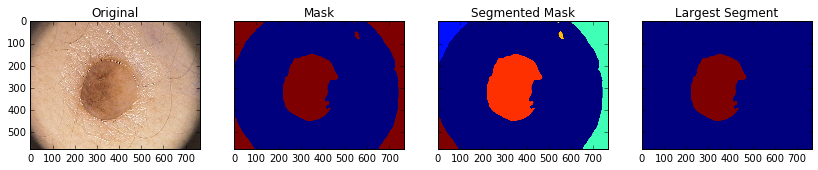

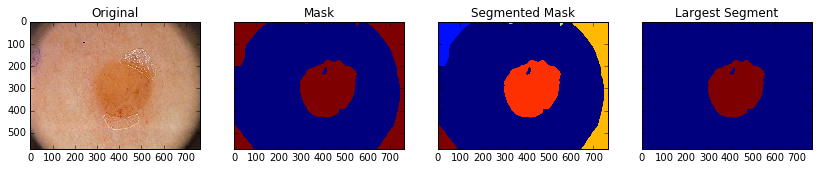

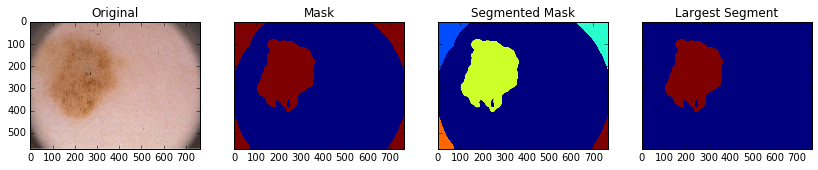

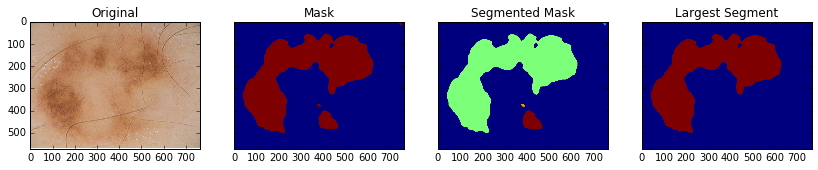

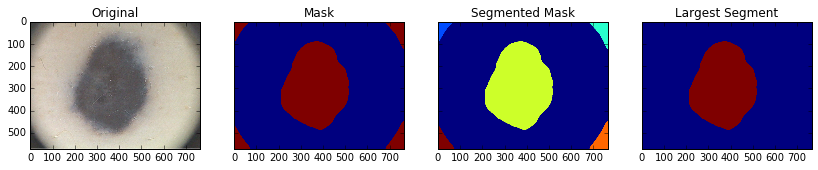

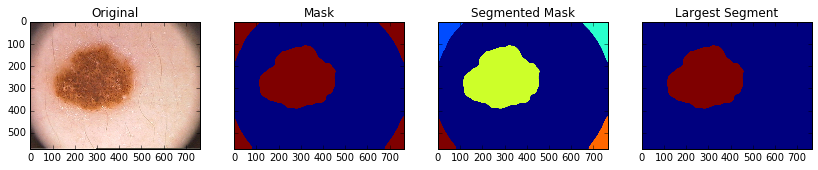

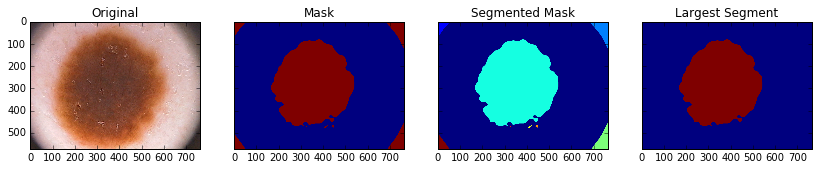

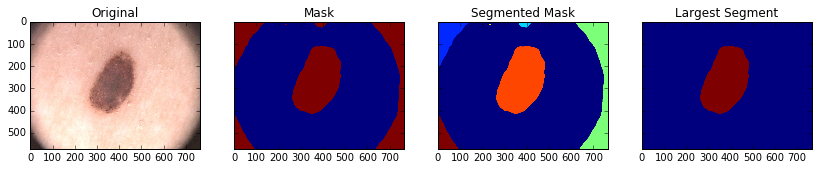

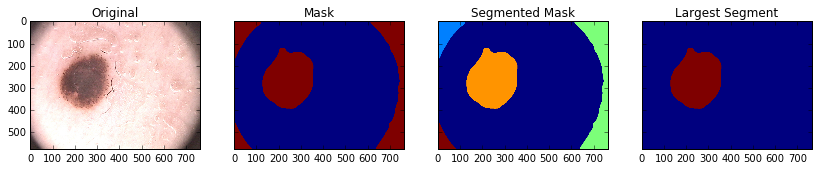

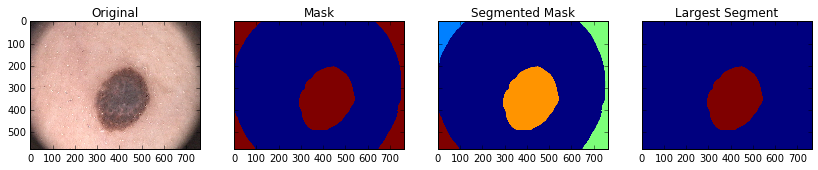

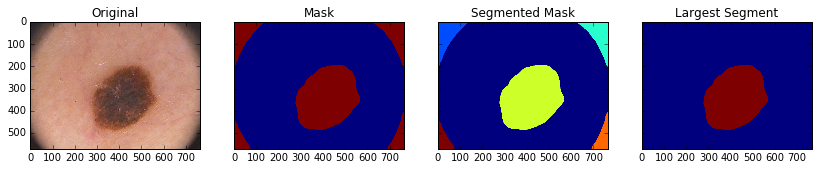

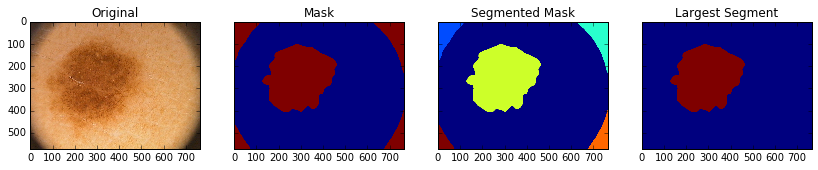

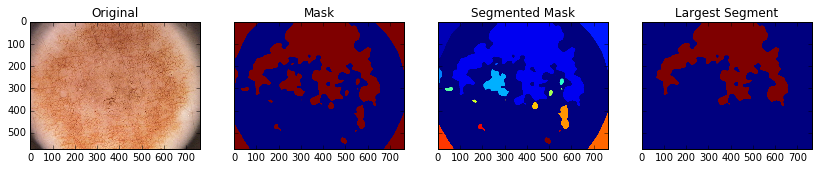

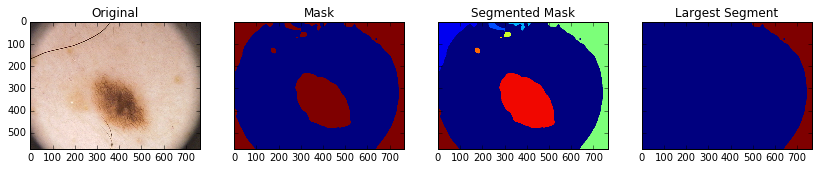

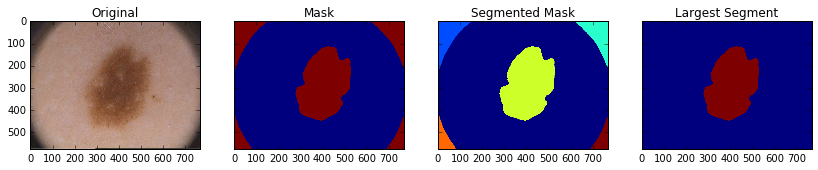

In [49]:
def create_mask(image, threshold=0.22):

    grey_img = rgb2gray(image)
    grey_img = median(grey_img, disk(10))
    grey_img = gaussian(grey_img, 5)

    size_index = 0
    increment = 0.03
    fudge = 0.0
    while size_index < threshold: # progressively increase the size of the mask until the threshold is met
        mask = grey_img > (fudge)
        (m,n) = mask.shape
        mask_size = bincount(mask.ravel())

        size_index = mask_size[0]/(m*n)
        fudge = fudge + increment
    
    return invert(mask), size_index


def remove_small_objects(image):
    label_objects, nb_labels = ndi.label(image)
    sizes = bincount(label_objects.ravel())
    mask_sizes = sizes > (sizes[0]*0.05) 
    mask_sizes[0] = 0
    return mask_sizes[label_objects]

for i in range(20):
    im = array(Image.open(all_images[i]))
    
    mask, mask_size_index = create_mask(im)
    #cleaned_mask = remove_small_objects(mask)
    
    labeled_areas, _ = ndi.label(mask)
    
    
    fig, axes = plt.subplots(1, 4, figsize=(14, 4), sharex=True, sharey=True,
                             subplot_kw={'adjustable': 'box-forced'})

    ax = axes[0]
    axes = axes[1:]
    ax.set_title("Original")
    ax.imshow(im)
    
    ax = axes[0]
    axes = axes[1:]
    ax.set_title("Mask")
    ax.imshow(mask)
    
    ax = axes[0]
    axes = axes[1:]
    ax.set_title("Segmented Mask")
    ax.imshow(labeled_areas)    
    
    ax = axes[0]
    axes = axes[1:]
    
    sizes = bincount(labeled_areas.ravel()) # array of pixel count in each region
    sizes[0] = 0 # first element is total of all regions, so zero that
    max = sizes.argmax() # get the index of the max element
    largest_region = labeled_areas == max # filter all regions except the largest
    ax.set_title("Largest Segment")
    ax.imshow(largest_region)
    
    
    
    
    

** Warning!: ** Some of the settings in the functions above are resolution dependent. Changing the size of the image will break them. 